## Handmade mechanical turk

In [1]:
import os
import numpy as np
from ipywidgets.widgets import interactive, interact_manual
import ipywidgets.widgets as wid
from functools import reduce
import matplotlib.pyplot as plt
from skimage.io import imread

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
folder = lambda x: r"results/{}/test_latest/images/".format(x)
models = ["cityscapes_cyclegan", "cityscapes_cyclegan_sn", 'cityscapes_cyclegan_wgan_gp']


In [3]:
files = [list(filter(lambda x:  'fake_A' in x, os.listdir(folder(model)))) for model in models]
files = [list(map(lambda x: os.path.join(folder(models[i]), x), files[i])) for i in range(len(files))]
files = reduce(lambda x,y: x+y, files)
handler = [files[0]]
files = files[1:]
notes =[]

In [4]:
def show(quality):
    file = handler[-1]
    plt.figure(figsize = (7,7))
    plt.imshow(imread(file))
    plt.show()
    print(len(handler), len(notes))
    if quality != 'Unknown':
        handler.append(np.random.choice(list(set(files).difference(set(handler)))))
        notes.append(quality)
interact_manual(show, quality=wid.Dropdown(options=['Unknown', 'Very Bad', 'Bad', 'Soso', 'Good', 'Very Good'],value='Unknown'))

interactive(children=(Dropdown(description='quality', options=('Unknown', 'Very Bad', 'Bad', 'Soso', 'Good', '…

<function __main__.show(quality)>

In [113]:
notes.append('Good')

In [114]:
data = {
    file:note for (file, note) in zip(handler, notes)
}

In [115]:
import pandas as pd

In [117]:
D = pd.DataFrame()

In [118]:
D['f'] = handler
D['n'] = notes

In [123]:
def gm(x):
    if '_sn' in x:
        return 'sn'
    elif '_wgan_gp' in x:
        return 'wgangp'
    else:
        return('base')
D['m'] = D['f'].apply(gm)

In [124]:
D.groupby('m').count()

,f,n
m,,
base,50,50
sn,50,50
wgangp,50,50


In [125]:
D.to_csv('mt.csv')

In [134]:
F = D.groupby(['m', 'n'], as_index=False).count()
F['f'] /= 50

In [139]:
F.columns = ['model', 'quality', 'average']

In [128]:
import seaborn as sns

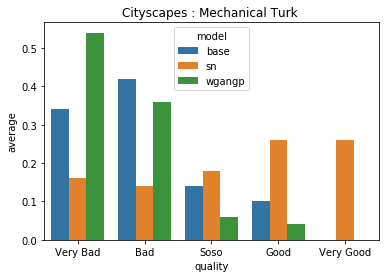

In [150]:
sns.barplot(x='quality', y='average', hue='model', data=F,order=["Very Bad", "Bad", "Soso", "Good", "Very Good"])
plt.title("Cityscapes : Mechanical Turk ")
plt.savefig("mt.eps")
plt.show()

In [147]:
F.iloc[[1,3,2,0,5,7,6,4,8,10,12,11,9],:]

,model,quality,average
1,base,Good,0.10
3,base,Very Bad,0.34
2,base,Soso,0.14
0,base,Bad,0.42
5,sn,Good,0.26
7,sn,Very Bad,0.16
6,sn,Soso,0.18
4,sn,Bad,0.14
8,sn,Very Good,0.26
10,wgangp,Good,0.04
